# Matriz de adjacência
Para mapearmos as relações entre serviços em uma arquitetura de microserviços e então possamos saber qual serviço numa dada rede, possui a maior probabilidade de ser alcançado (probabilidade assintótica da cadeia de Markov), independente de onde for a requisição inicial.




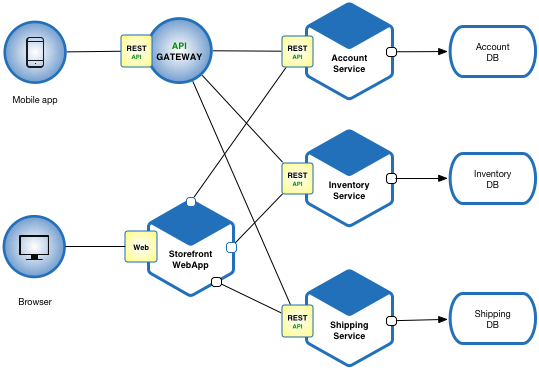

### Considere  a sequinte configuração desta matriz de  adjacência

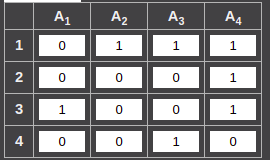

#### Na matriz acima, cada linha representa um serviço x, e cada coluna seria o serviço y que o serviço x está conectado.
#### Desta forma, na linha, o serviço 1 se comunica com { servico2, serviço 3, serviço 4}, ou seja, as células marcada com valor 1.

### Roteiro:
* Item 1: Construir a matriz de adjacência
* Item 2: Construir matriz de probabilidade 
* Item 3: Resolver sistema para encontrar a distribuicao assintótica, [x,y,z,w] = A [x,y,z,w]
* Item 3: Encontrados [x,y,z,w], deve-se ordená-los e então o maior valor indicará a posição do serviço procurado.


### Matriz de adjacência abaixo: Supondo  que não há servicos absorventes.

In [118]:
class Matriz_Adjacência:
    def __init__(self,vertices):
        self.vertices =  vertices
        self.grafo = [[0]*self.vertices for i in range(self.vertices)]
    
    def adiciona_aresta(self, linha, coluna,valor=1):
        self.grafo[linha-1][coluna-1] = valor
    
    def mostra_matriz(self):
        print('A matriz de adjacência é:')
        for i in range(self.vertices):        
            print(self.grafo[i])
        #print (self.grafo)
       
    
    def pega_valor_celula(self, linha, coluna):
        return self.grafo[linha][coluna]
    
    def pega_numero_conexoes(self,linha):
        numeroConexoes = 0
        for coluna in range(self.vertices):            
            if g.pega_valor_celula(linha-1, coluna) == 1: 
                numeroConexoes = numeroConexoes + 1
        return numeroConexoes
    
    def pega_probabilidade(self, linha, coluna):
        probabilidadeLinha = 0        
        numeroConexoes =  g.pega_numero_conexoes(linha)
        #a probabilidade é identica para celula nao nulas. O cálculo desta é:
        if numeroConexoes > 0: 
            probabilidadeLinha = 1/numeroConexoes
        #Se a celula nao é nula, retorna a probabilidade    
        if g.pega_valor_celula(linha-1, coluna-1) == 1: 
            return probabilidadeLinha
        else:
            return 0
        
    def cria_matriz_transicao_probabilidade(self):
        self.matrizTransProb = [[0]*self.vertices for i in range(self.vertices)]
        for linha in range(self.vertices):             
            for coluna in range(self.vertices):                              
                probabilidade = g.pega_probabilidade(linha+1,coluna+1)
                self.matrizTransProb[linha][coluna]=probabilidade
        return self.matrizTransProb
    
    def cria_matriz_coeficientes_A(self):
        self.matrizTransEquacoes = [[0]*self.vertices for i in range(self.vertices)]
        for coluna in range(self.vertices - 1 ):  #ir ate linha n-1           
            for linha in range(self.vertices):   
                probabilidade = g.pega_probabilidade(linha+1,coluna+1)
                if(coluna != linha):                
                    self.matrizTransEquacoes[coluna][linha]=probabilidade 
                else: #passando x y z..do segundo pro primeiro membro
                    self.matrizTransEquacoes[coluna][linha]= probabilidade-1                
        for coluna in range(self.vertices):
            self.matrizTransEquacoes[self.vertices-1][coluna]=1                   
        return self.matrizTransEquacoes   
    
    
    def cria_matriz_termos_independentesB(self):
        self.matrizTermosIndep = [[0] for i in range(self.vertices)]
        self.matrizTermosIndep[self.vertices-1][0] = 1
        return self.matrizTermosIndep
    
    def ordenar_servicos_maior_probabilidade(self,resultado):
        self.matrizServicos = [0 for i in range(self.vertices)]
        for linha in range(self.vertices): 
            self.matrizServicos[linha] = resultado[linha][0]
        return np.sort(self.matrizServicos)
            
       
                                  
 


            
        


        

### Cria matriz de adjacência: quais serviços cada serviço se comunica

In [119]:

g = Matriz_Adjacência(4)

#Microservice a (linha, coluna)
g.adiciona_aresta(1,2)
g.adiciona_aresta(1,3)
g.adiciona_aresta(1,4)


#Microservice 1 
g.adiciona_aresta(2,4)

#Microservice 2 
g.adiciona_aresta(3,4)

#Microservice 3(3,2,1)
g.adiciona_aresta(3,1)
g.adiciona_aresta(3,4)

#Microservice 4
g.adiciona_aresta(4,3)


g.mostra_matriz()
#g.pega_valor_celula(3,3)
#g.pega_numero_conexoes(4)
#g.pega_probabilidade(4,4)
#g.cria_matriz_transicao_probabilidade()

A matriz de adjacência é:
[0, 1, 1, 1]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 0, 1, 0]


## Montar sistema AX = B

### Matriz dos coeficientes A

In [120]:
A = g.cria_matriz_coeficientes_A()
print()
print("Matriz A:")
print(A)


Matriz A:
[[-1, 0, 0.5, 0], [0.3333333333333333, -1, 0, 0], [0.3333333333333333, 0, -1, 1.0], [1, 1, 1, 1]]


### Matriz dos termos independentes B

In [121]:
B = g.cria_matriz_termos_independentesB()
print()
print("Matriz B :")
print(B)


Matriz B :
[[0], [0], [0], [1]]


### Resolver o sistema. Encontrar o valor da matriz das incógnitas X:

In [122]:
print()
print("Resolvendo o sitema AX = B; onde X = Invesa(A) * B:")

matriz_das_incognitasX = np.matmul(Ainversa, B)

print (matriz_das_incognitasX)


Resolvendo o sitema AX = B; onde X = Invesa(A) * B:
[[0.2       ]
 [0.06666667]
 [0.4       ]
 [0.33333333]]


### Ordenar os resultados para visualizar os serviços que possuem maior probabilidade de que uma requisição começar de algum lugar e chegar até ele.

In [124]:
servicosOrdenados = g.ordenar_servicos_maior_probabilidade(result)

print(servicosOrdenados)

[0.06666667 0.2        0.33333333 0.4       ]


#### Neste Caso o serviço 4, possui maior probabilidade (0.4). Indicando que ele possui preferência para ser refatorado a fim de melhorar a sua performance já que é o mais utilizado pelos outros serviços.